# Zufallszahlen Erzeugen

## Vertiefung

### Übersicht

1. Middle-Square-Methode mit $n$-stelligen Zahlen
2. Mapping auf das Einheitsintervall 
3. NumPy Random
4. Inversionsmethode (Inverse Transform Sampling)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Middle-Square-Methode mit $n$-stelligen Zahlen

In der Einarbeitung haben wir die Middle-Square-Methode mit 4-stelligen Zahlen kennengelernt. Diese Methode lässt sich auch auf eine beliebige Anzahl Stellen verallgemeinern. Es muss aber eine gerade Anzahl sein.

In [20]:
def msm_next_4(number):
    """Ein Schritt der Middle-Square-Method für 4-stellige Zahlen."""
    n2_padded = str(number**2).zfill(8)
    return int(n2_padded[2:-2])


def msm_next(number, n_digits):
    """Ein Schritt der Middle-Square-Method für beliebig-stellige Zahlen."""
    n2_padded = str(number**2).zfill(2* n_digits)
    return int(n2_padded[n_digits//2:-n_digits//2])


msm_next(234534512346, 12)


437481376026

In [21]:
def msm(seed, n):
    """Middle-Square-Method mit Seed und Anzahl Schritten n"""
    n_digits = len(str(seed))
    number = seed
    sequence = []
    for _ in range(n):
        number = msm_next(number, n_digits)
        sequence.append(number)
    return np.array(sequence)


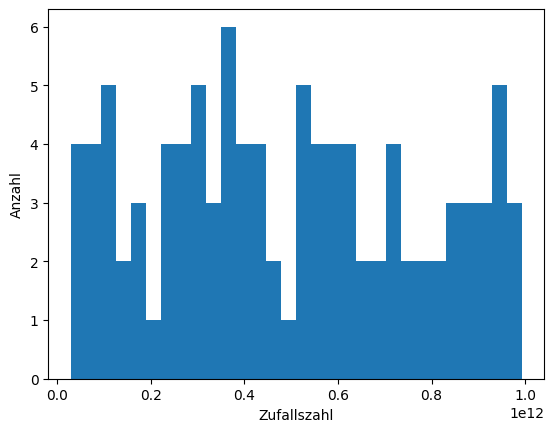

In [24]:
x = msm(234534512346, 100)

plt.hist(x, bins=30)
plt.xlabel("Zufallszahl")
plt.ylabel("Anzahl")
plt.show()


#### Maximale Periodenlänge

In [27]:
def msm_period(seed):
    n_digits = len(str(seed))
    number = seed
    sequence_set = set()
    while number not in sequence_set:
        sequence_set.add(number)
        number = msm_next(number, n_digits)
    period = len(sequence_set)
    return period, number


In [29]:
# Für 2-stellige Seeds
periods_2_digits = [(seed, msm_period(seed)[0]) for seed in range(10, 100)]
max_seed_2_digits, max_period_2_digits = max(periods_2_digits, key=lambda x: x[1])
print(
    f"Die maximale Periode für 2-stellige Seeds ist {max_period_2_digits} und wird erreicht bei Seed {max_seed_2_digits}."
)

# Für 4-stellige Seeds
periods_4_digits = [(seed, msm_period(seed)[0]) for seed in range(1000, 10000)]
max_seed_4_digits, max_period_4_digits = max(periods_4_digits, key=lambda x: x[1])
print(
    f"Die maximale Periode für 4-stellige Seeds ist {max_period_4_digits} und wird erreicht bei Seed {max_seed_4_digits}."
)

# Für 6-stellige Seeds (läuft ca. 5 min!)
periods_6_digits = [(seed, msm_period(seed)[0]) for seed in range(100000, 1000000)]
max_seed_6_digits, max_period_6_digits = max(periods_6_digits, key=lambda x: x[1])
print(
    f"Die maximale Periode für 6-stellige Seeds ist {max_period_6_digits} und wird erreicht bei Seed {max_seed_6_digits}."
)


Die maximale Periode für 2-stellige Seeds ist 15 und wird erreicht bei Seed 42.
Die maximale Periode für 4-stellige Seeds ist 111 und wird erreicht bei Seed 6239.


KeyboardInterrupt: 

### Mapping auf das Einheitsintervall

Der MSM Algorithmus (wie bessere Algorithmen auch) erzeugt ganzzahlige Zufallszahlen, die Gleichverteilt sind. Diese müssen für viele Anwendungen zuerst auf das Einheitsintervall von 0 bis 1 abgebildet werden. Je nach Konvention wird das Intervall entweder inklusive oder exklusive der Grenzen betrachtet. Wir folgen hier der Konvention von NumPy und nehmen das halb-offene Intervall, siehe [`numpy.random.Generator.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html).

$$
    X \sim U(1,0)
    \quad \Rightarrow \quad
    f(x) = \begin{cases}
        1 & \text{für } x \in [0,1) \\
        0 & \text{sonst}
    \end{cases}
$$

Hier steht $U(0,1)$ für die Gleichverteilung auf dem Intervall $[0,1)$ und $f(x)$ für die Wahrscheinlichkeitsdichte.

In [35]:
def uniform(seed, n):
    n_digits= len(str(seed))
    max_number = 10**n_digits
    return msm(seed,n) / max_number

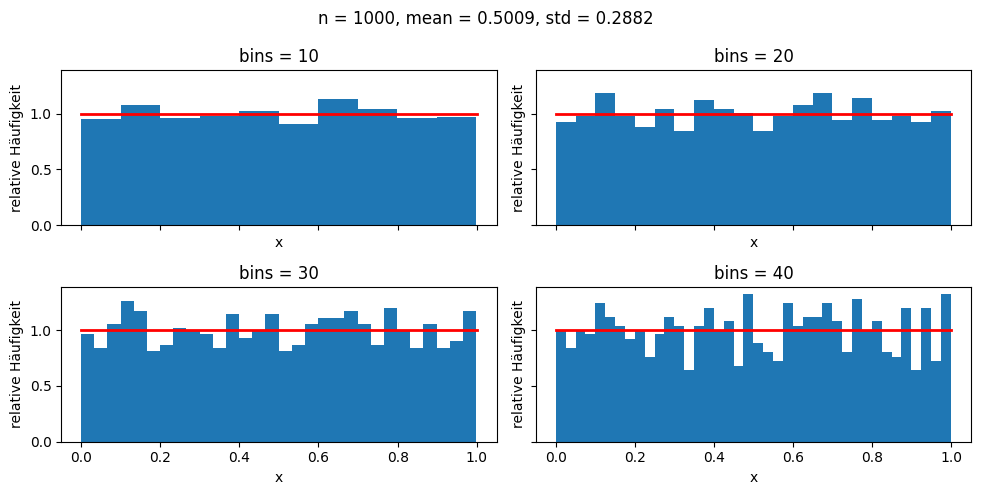

In [37]:
u = uniform(9018723491827345, 1_000)

fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharex=True, sharey=True)
for ax, bins in zip(axes.flat, (10, 20, 30, 40)):
    ax.hist(u, bins=bins, density=True)
    ax.plot([0, 1], [1, 1], color="red", linewidth=2)
    ax.set_xlabel("x")
    ax.set_ylabel("relative Häufigkeit")
    ax.set_title(f"bins = {bins}")
plt.suptitle(f"n = {len(u)}, mean = {u.mean():.4f}, std = {u.std():.4f}")
plt.tight_layout()
plt.show()


### NumPy Random

Der Einstiegspunkt in die Dokumentation ist hier: https://numpy.org/doc/stable/reference/random/index.html

Grundsätzlich wird zuerst ein [Random Generator](https://numpy.org/doc/stable/reference/random/generator.html) mit einem Seed instanziert und dann für die Erzeugung von Pseudozufallszahlen verwendet

#### Gleichverteilung

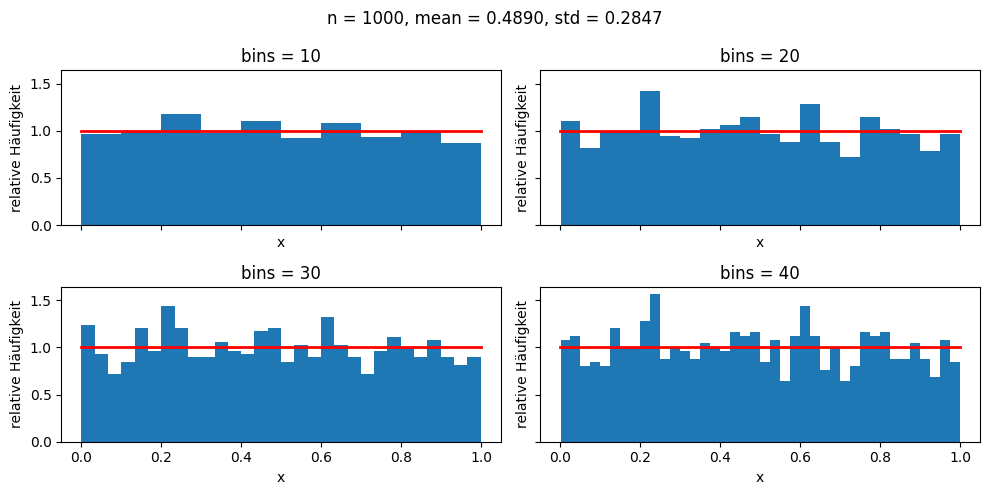

In [53]:
rng = np.random.default_rng(981723)

u = rng.uniform(0,1, 1_000)

fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharex=True, sharey=True)
for ax, bins in zip(axes.flat, (10, 20, 30, 40)):
    ax.hist(u, bins=bins, density=True)
    ax.plot([0, 1], [1, 1], color="red", linewidth=2)
    ax.set_xlabel("x")
    ax.set_ylabel("relative Häufigkeit")
    ax.set_title(f"bins = {bins}")
plt.suptitle(f"n = {len(u)}, mean = {u.mean():.4f}, std = {u.std():.4f}")
plt.tight_layout()
plt.show()



#### Weitere Verteilungen

Der NumPy Random Generator bietet eine grosse [Auswahl Verteilungen](https://numpy.org/doc/stable/reference/random/generator.html#distributions) an. Scipy bietet noch [weitere Verteilungen](https://docs.scipy.org/doc/scipy/reference/stats.html) an, unter anderem auch [multivariate Verteilungen](https://docs.scipy.org/doc/scipy/reference/stats.html#multivariate-distributions).

Beispiel: [Gammaverteilung](https://de.wikipedia.org/wiki/Gammaverteilung) mit [`rng.gamma`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.gamma.html)

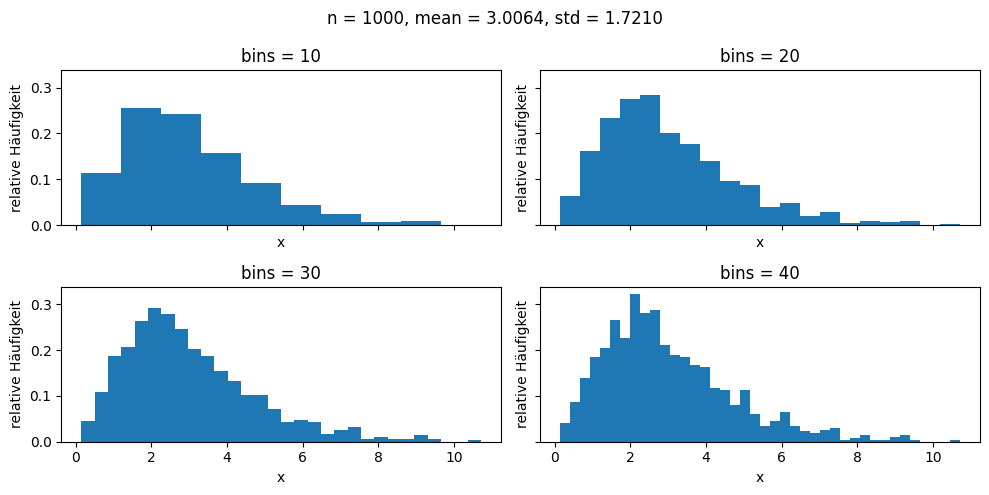

In [71]:
rng = np.random.default_rng(981723)

u = rng.gamma(3,1, 1_000)

fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharex=True, sharey=True)
for ax, bins in zip(axes.flat, (10, 20, 30, 40)):
    ax.hist(u, bins=bins, density=True)
    #ax.plot([0, 1], [1, 1], color="red", linewidth=2)
    ax.set_xlabel("x")
    ax.set_ylabel("relative Häufigkeit")
    ax.set_title(f"bins = {bins}")
plt.suptitle(f"n = {len(u)}, mean = {u.mean():.4f}, std = {u.std():.4f}")
plt.tight_layout()
plt.show()

#### Mischen

- [`rng.shuffle`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html)	
- [`rng.permutation`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html)
- [`rng.permuted`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html)

Vorsicht: Dokumentation genau lesen!

In [76]:
rng = np.random.default_rng(42)
x = np.arange(8)

print(rng.shuffle(x)) 
#shuffel ändert die reihenfolge von x 
print("\n", x)


None

 [3 4 2 7 6 1 5 0]


In [78]:
# x wird nicht geändert 

rng = np.random.default_rng(42)
x = np.arange(8).reshape(4,2)

print(rng.permuted(x))
print("\n", x)


[[3 4]
 [2 7]
 [6 1]
 [5 0]]

 [[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [80]:
rng = np.random.default_rng(42)
x = np.arange(8).reshape(4,2)
print(rng.permutation(x,axis=1))
print("\n", x)


[[1 0]
 [3 2]
 [5 4]
 [7 6]]

 [[0 1]
 [2 3]
 [4 5]
 [6 7]]


#### Auswählen

Samples aus einer Menge zieht man mit [`rng.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html) entweder mit oder ohnr zurücklegen `replace=True/False`.

In [ ]:
rng = np.random.default_rng(42)
x = np.arange(8)

rng.choice(x, size=99)


In [ ]:
rng = np.random.default_rng(42)
x = np.arange(8)

rng.choice(x, size=3)


### Inversionsmethode (Inverse Transform Sampling)

Wie werden nun Verteilungen erzeugt, die nicht Gleichverteilungen sind? Die einfachsten Verfahren sind:

- [Inversionsmethode](https://de.wikipedia.org/wiki/Inversionsmethode)
- [Verwerfungsmethode](https://de.wikipedia.org/wiki/Verwerfungsmethode)

Hier diskutieren und implementieren wir die Inversionsmethode für diskrete Verteilungen. Die Inversionsmethode für stetige Verteilungen wird im Übungsblatt implementiert und kam bereits im Modul "Statistik & Wahrscheinlichkeit" vor (Serie 3, Aufgabe 3c).

Als Beispiel schauen wir an, welche Farbe wohl eine Verkehrsampel anzeigt, wenn man bei ihr ankommt. Wenn die Ampel immer 10 Sekunden auf grün steht, 20 Sekunden auf rot und dazwischen je 1 Sekunden auf Orange, dann ist die Wahrscheinlichkeit folgendermassen

$$
\begin{align*}
    p(\text{grün}) &= \frac{10}{32} \,,\qquad&
    p(\text{rot}) &= \frac{20}{32} \,,\qquad&
    p(\text{orange}) &= \frac{2}{32}
\end{align*}
$$

In [ ]:
values = ["grün", "rot", "gelb"]
probabilities = np.array([10, 20, 2])
probabilities = probabilities / probabilities.sum()

plt.bar(values, probabilities)


### Alternative: Verwerfungsmethode (Rejection Sampling)

Optionale Übung: Implementiere die Verwerfungsmethode für die Gamma-Verteilung

- ["Zufallszahlen generieren: Verwerfungsmethode 01: Die Idee" - LernenInVerschiedenenFormen](https://www.youtube.com/watch?v=il9W8vdESX0)
- ["Zufallszahlen generieren: Verwerfungsmethode 02: Algorithmus" - LernenInVerschiedenenFormen](https://www.youtube.com/watch?v=SaHA_NhELIo)